<a href="https://colab.research.google.com/github/tomafischer/ai_geeks/blob/main/Python_Snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import pytest

# General: Directory, Path functions, Formating

Conda create python environment
```bash
## create env
conda create --name py12 python=3.12
conda env remove --name py12

## activate venv
python -m venv .venv

# Windows
.venv\Scripts\activate

#Linux/Mac

## upgrade pip
python.exe -m pip install --upgrade pip --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org111

## install packages for requirements.txt
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org -r requirement.txt

## work around the ssl issues
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org <package_name>
```

### Jupyter
# Install and run
```
pip install notebook
# Run
jupyter notebook
```

Autocomplete
```
%config Completer.use_jedi = False
setting indentation to 2
```
https://stackoverflow.com/questions/19068730/how-do-i-change-the-autoindent-to-2-space-in-ipython-notebook
```javascript
var cell = Jupyter.notebook.get_selected_cell();
var config = cell.config;
var patch = {
      CodeCell:{
        cm_config:{indentUnit:2}
      }
    }
config.update(patch)
```
## Send it interactive Visual Code
Preferences -> Settings -> Send Selection To Interactive Window
## Sharepoint
[Setting up Sharepoint](
https://stackoverflow.com/questions/55922791/azure-sharepoint-multi-factor-authentication-with-python)

https://github.com/vgrem/Office365-REST-Python-Client
```bash
pip install Office365-REST-Python-Client
```



In [ ]:
#shows all variables
%whos

Variable       Type      Data/Info
----------------------------------
current_path   str       /
np             module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os             module    <module 'os' from '/usr/lib/python3.7/os.py'>
sample_mean    float     3.2344
st             module    <module 'scipy.stats' fro<...>scipy/stats/__init__.py'>
sys            module    <module 'sys' (built-in)>


In [ ]:
# clear the workspace
%reset -sf

In [ ]:
#### Python version
import sys
import os
import numpy as np
print(f"python version: {sys.version}")

#####
#   Directory, Path functions
#####
# Get current directory
current_path = os.getcwd()
print(os.getcwd())
#get file name from path
os.path.basename(current_path)
os.chdir('../')

# adjusting unix file patht to windows
import os
def adjust_path(path):
    return os.path.join(*path.split('/'))

#string formating
sample_mean = 3.2344
print(f'We have determined the mean of the population to be {sample_mean:.2f}')



import scipy.stats as st
st.norm.rvs(loc= 3, scale=2, size=6)

python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
/
We have determined the mean of the population to be 3.23


array([ 3.0314927 ,  2.61193682, -0.37117757,  3.035198  ,  4.3989898 ,
        2.89420159])

# List operations: slicing, from List to string
# Dictonaries

In [ ]:
###
# Check for empty or None
###
if not []:
  print("list is empty")

###
# to string from list
###
list1 = [1, 2, 3,4 ]
list2 = [str(i) for i in list1]
','.join(list2)
str1 = ','.join(str(e) for e in list1 if e%2)
print(str1)

import json
# dict to json
json.dumps([{'a':1},{'b':1}])


#slicing
print(f"Second to last { list1[1:]}")
print(f"First to last to last { list1[:-1]}")
print(f"every second: { list1[::2]}")

###
# Dictonary
##
#merge
x = {'a': 1, 'b': 2}
y = {'b': 10, 'c': 11}
# >= python 3.9
z = x|y
# >= phthon 3.5
z = {**x, **y}

1,3
Second to last [2, 3, 4]
First to last to last [1, 2, 3]
every second: [1, 3]


# Conditional for if

In [ ]:
l = [1,2,3,4]
",".join([str(i) for i in l if i%2==0])

'2,4'

# Random, shuffeling, smapling

uuid: b7fa26e9-f51f-4e97-a2d4-0ee3d76d2975


array([7, 4, 5, 2, 7])

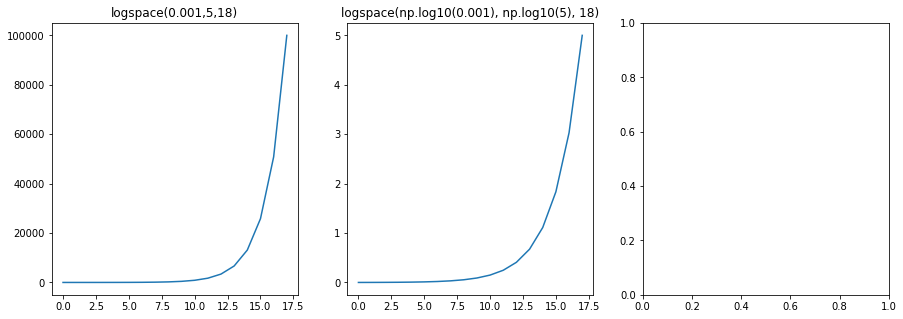

In [ ]:
####
#.   Random
####
## integers
import numpy as np
import matplotlib.pyplot as plt
import uuid


#https://docs.python.org/3/library/uuid.html
uid = str(uuid.uuid4())
print(f"uuid: {uid}")

np.random.randint(1,100)
#44
data = np.random.randint(1,100,10)
#array([13, 64, 27, 63, 46, 68, 92, 10, 58, 24])

#random float unform
np.random.rand(1)[0]

# uniform distribution over [0, 1)
np.random.rand(2)
# array([ 0.11570539,  0.35279769])

# Return a sample (or samples) from the "standard normal" distribution
np.random.randn(2)
# -> array([-0.27954018,  0.90078368])

rows = 20 # rows (m)
cols = 6 # columns (n)
rand_np = np.random.randn(rows, cols)


# one over f distribution. - logspace
#logspace 10^1 ... 10^5
f1 = np.logspace(0.001,5,18)
# to get from 1..5 we have to add log
f2 = np.logspace(np.log10(0.001), np.log10(5), 18)
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax= axs[0]
ax.set_title("logspace(0.001,5,18)")
ax.plot(f1)
ax = axs[1]
ax.set_title("logspace(np.log10(0.001), np.log10(5), 18)")
ax.plot(f2)

# shuffling data
np.random.shuffle(data)

# sampling (like for Monte Carlo)
np.random.choice(np.array([1,2,3,4,5,6,7]), size= 5)

In [ ]:
# inline if
# expression_if_true if condition else expression_if_false
a= 2
1 if a>0 else 0

print(f"a > 0? : {1 if a>0 else 0}")
#wine_data_normalized['boolQuality']=wine_data_normalized['quality'].apply(lambda x: 1 if x> 5 else 0)

# inline list calculation
ts = [ t+t for t in range(5)]
print(ts)

a > 0? : 1
[0, 2, 4, 6, 8]


# Datetime

In [ ]:
########
#   Datetime
########
from datetime import datetime, timedelta
start_dt = datetime(2021,10,6) # Wednesday
#time add or subtract
add_dt = start_dt + timedelta(days=6)
end_dt = datetime.strptime('2020-01-01 18:27:25', "%Y-%m-%d %H:%M:%S")
#Print weekday
print(start_dt.strftime("%a"))


def date_parse_iso_seconds_fraction(date_str, format_str='%Y-%m-%d %H:%M:%S', verbose= False):
  #if no date, return None
  if date_str is None:
    return None
  try:
    last_dot = date_str.rfind('.')
    digits = len(date_str) - last_dot - 1

    date_ts = datetime.strptime(date_str[0:last_dot], format_str)#.timestamp()
    fraction_str = date_str[last_dot+1:len(date_str)]
    fraction = float(fraction_str) / 10**digits
    date_ts += timedelta(seconds=fraction)
    if verbose:
      print(f'digits: {digits} : {fraction_str}')
    return date_ts

  except Exception as ex:
    raise ex
    if verbose:
      print(ex)
    return None

class Test_Date(unittest.TestCase):
  def test_date_parse_iso_seconds_fraction(self):
    # arrange
    dates =['2020-01-01 18:27:25.1','2020-01-01 18:27:25.12','2020-01-01 18:27:25.123',
            '2020-01-01 18:27:25.1234','2020-01-01 18:27:25.12345','2020-01-01 18:27:25.123456']

    # act
    results = [date_parse_iso_seconds_fraction(str) for str in dates]
    #print(results)
    # assert
    self.assertEqual(results[0].microsecond,1 * 1e5)
    self.assertEqual(results[1].microsecond,12 * 1e4)
    self.assertEqual(results[2].microsecond,123 * 1e3)
    self.assertEqual(results[3].microsecond,1234 * 1e2)
    self.assertEqual(results[4].microsecond,12345 * 1e1)
    self.assertEqual(results[5].microsecond,123456 )
unittest.main(argv=[''], verbosity=2, exit=False)

test_date_parse_iso_seconds_fraction (__main__.Test_Date) ... ok
test_add_int (__main__.Test_add_int) ... 

Wed


ok

----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


In [ ]:
datetime.now().timestamp()

1635282194.981052

#Enumerations and Iterations

In [ ]:
####
#. Enumerations and Iterations
###
for i,v in enumerate([11,22,33]):
  print(f"Enumerate enum:{i} value: {v}")

for i in range(2,3):
  print(f"Range value {i}")

#will get you the next element
n = next(iter([11,22,33]))
print(f"Next/First {n}")

iteration = iter([11,22,33])
for i in range(3):
  print(next(iteration))

Enumerate enum:0 value: 11
Enumerate enum:1 value: 22
Enumerate enum:2 value: 33
Range value 2
Next/First 11
11
22
33


# Numpy and Pandas
for parquet you have to install pyarrow: `pip install pyarrow`
```
np.hstack - np.vastck to combine arrays

```

In [ ]:
import pandas as pd
## change string to date
items_pd["Start"] = pd.to_datetime(items_pd["Start"], format= "%Y-%m-%d %H:%M:%S")
# lamda function
data_pd['new column'] = data_pd.apply(lambda x: my_function(x["Sched_Start_DT"]), axis =1)

In [ ]:
##
# Interating, filtering, sorting
##

# getting columns
list(df.columns)

# Interating
for index, row in df.iterrows():
    print(row['name'])

# fitlering
merged_pd.dropna()
## fitler all na recoreds
filtered_pd = merged_pd.dropna()
#check for contain string
filtered_pd =  filtered_pd[filtered_pd['tag'].str.contains(tag)]

## join
merged_pd = pd.merge(raw_pd, mapping_pd, how='left', left_on='KEY', right_on='id'
# or with suffix
diff_added = pd.merge(original_pd,compare_pd, how="right", on =on,suffixes= ['_original','_new']))

def pd_compare_datasets(original_pd: pd, compare_pd: pd, on : list,  compare_column: str, suffixes=['_o','_c'] ) -> pd:
    """
    Compares two pandas datasets and returns added/deleted records
    """
    diff_added = pd.merge(original_pd,compare_pd, how="right", on =on,suffixes= suffixes)
    diff_added = diff_added[diff_added[f'{compare_column}{suffixes[0]}'].isnull()]
    diff_del = pd.merge(original_pd,compare_pd, how="left", on = on,suffixes= suffixes)
    diff_del = diff_del[diff_del[f'{compare_column}{suffixes[1]}'].isnull()]
    return {
        'added': diff_added,
        'del': diff_del
        }

###
#  Date functions
##

In [ ]:
import numpy as np
# Create data
#np array of discreat values
'''The essential difference between NumPy linspace and NumPy arange is that
linspace enables you to control the precise end value, whereas arange gives you
more direct control over the increments between values in the sequence.
'''
start_interval =1
end_inerval = 20
howmany =10
interval =0.5
np.linspace(start_interval, end_inerval, howmany)
np.arange(start_interval, end_inerval, interval)

rows = 20 # rows (m)
cols = 6 # columns (n)
data_np  = np.zeros((rows,cols))
rand_np = np.random.randn(rows, cols)

In [ ]:
import pandas as pd
import numpy as np
a_np = np.array([[11,22,33],[44,55,66]])
# numpy to pandas
a_pd = pd.DataFrame(a_np, columns=['a','b','c'])

import json
# dict to json
json.dumps([{'a':1},{'b':1}])

## pandas to json/dict
a_json = a_pd.to_json(orient='records')
a_pd.to_dict('records')
## json to pandas
a2_pd = pd.read_json(a_json) # could also be a file path or url
print(a2_pd)

#pandas to json file
data_pd.to_json(f'tests/test_data/archive_{archive_date_str}.json', orient='records')

# data_pd =pd.read_parquet(f"{file_name}.parquet")
# data_pd.to_excel(f"{file_name}.xlsx",sheet_name="Scope_Stability_Raw_7month_ahea", index = False)

    a   b   c
0  11  22  33
1  44  55  66


In [ ]:

a_np = np.array([[11,22,33],[44,55,66]])
# numpy to pandas
a_pd = pd.DataFrame(a_np, columns=['a','b','c'])

#####
#    Combining two Numpy/Array into Pandas Array
#####
N = 100
data1 = np.random.rand(N)
data2 = np.random.randn(N)
# use vstack to combine data and then transpose
data_np = np.vstack((data1, data2)).T
data_pd = pd.DataFrame(data = data_np, columns = ["Random", "Normal"])
print(data_pd)
# or using a dictonary for creation
data2_pd = pd.DataFrame(data = {"Random": data1, "Normal" :data2})


### Combine both with hstack to combine features already in the right shape
b_np = a_np.copy() + 40
ab_np = np.hstack((a_pd, b_np))
ab_pd = pd.DataFrame(ab_np, columns=['a','b','c','d','e','f'])
print(ab_pd)

# use vsatck to add to numby one dimensonal arrays to a data series
N = 100
data1 = np.random.rand(N)
data2 = np.random.randn(N)
# use vstack to combine data and then transpose
data_np = np.vstack((data1, data2)).T
data_pd = pd.DataFrame(data = data_np, columns = ["Random", "Normal"])

### from and to JSON
ab2_dict ={ 'A':1,'B':2 }
#from dict
ab2_pd = pd.DataFrame([ab2_dict])
#to json
ab2_json = ab2_pd.to_json(orient='records')
print(f"json: {ab2_json}")
ab3_dict = ab2_pd.to_dict('records')
print(f"dict: {ab3_dict}")

      Random    Normal
0   0.470923 -0.205153
1   0.110652 -0.386213
2   0.476152  1.478430
3   0.294141 -0.550930
4   0.077866  0.058423
..       ...       ...
95  0.359723  0.030086
96  0.954855 -0.294603
97  0.535340  0.216102
98  0.283317 -0.510530
99  0.702384 -0.413734

[100 rows x 2 columns]
      Random    Normal
0   0.470923 -0.205153
1   0.110652 -0.386213
2   0.476152  1.478430
3   0.294141 -0.550930
4   0.077866  0.058423
..       ...       ...
95  0.359723  0.030086
96  0.954855 -0.294603
97  0.535340  0.216102
98  0.283317 -0.510530
99  0.702384 -0.413734

[100 rows x 2 columns]
    a   b   c   d   e    f
0  11  22  33  51  62   73
1  44  55  66  84  95  106
json: [{"A":1,"B":2}]
dict: [{'A': 1, 'B': 2}]


In [ ]:
#############
#     Unit testing
#############
import unittest
# function to be tested
def add_int(a:int,b:int ) -> int:
  return a+b

# Test class
class Test_add_int(unittest.TestCase):
  def test_add_int(self):
    # arrange
    a = 2
    b =3
    # act
    c = add_int(a, b)
    # assert
    self.assertEqual(c, a+b, ' test for sum')

# running the tests
unittest.main(argv=[''], verbosity=2, exit=False)

test_add_int (__main__.Test_add_int) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


# Arg parsing

In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--pmu_name', type=str, help='PMU name',required=True)
parser.add_argument('--learning_rate', type=float, help="Model name",required=True)
parser.add_argument('--batch_size', type=int, help="Size of batch",required=True)

args = parser.parse_args()

pmu_name = args.pmu_name

usage: ipykernel_launcher.py [-h] --pmu_name PMU_NAME --learning_rate
                             LEARNING_RATE --batch_size BATCH_SIZE
ipykernel_launcher.py: error: the following arguments are required: --pmu_name, --learning_rate, --batch_size


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#Pytest
pytest.int
```
[pytest]
markers =
    sp: Sharepoint tests
    manual: Run tests only manual
```    

```bash
# list all markers
pytest --markers
# run only cetain markers
pytest -m sp
```

In [ ]:
#conftest.py
@pytest.fixture(scope="session")
def app_principal():
    print("app_principal loaded")
    yield  {
        'client_id': '',
        'client_secret': '',
        }
    print("app_principal finalized")
### old way
# def app_principal(request):
#     print("app_principal loaded")

#     def app_priniciap_fin():
#         print("app_principal finished")
#     request.addfinalizer(app_priniciap_fin)
#     return {}


In [ ]:
@pytest.mark.skip
@pytest.mark.manual
def test_function_manual:
  assert ==1

# assert exceptions
def f():
    raise SystemExit(1)


def test_mytest():
    with pytest.raises(SystemExit):
        f()

# Venvs
Build in Python
```bash
#create virtual directory
python -m venv .venv

# .venv/pyvenv.cfg has the current active python link in there

## Activate
#unix/mac
source ./.venv/bin/activate
# Windows
PS> .venv\Scripts\activate

## Install Packages
pip install -r requirement.txt
or
python -m pip install <package name>

## Deactivating
deactivate
```